In [1]:
import mysql.connector as connector

conn = connector.connect(user='root', password='123456', host='localhost', port='3306', database='my_db')

my_cursor = conn.cursor()

In [2]:
my_cursor.execute('Select * from price_sentiment')

results = my_cursor.fetchall()

In [3]:
import pandas as pd

df = pd.DataFrame(results, columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Splits', 'Score', 'Positive', 'Negative', 'Neutral',	'Total_Sentiment'])



In [4]:
df.set_index('Date', drop=True, inplace=True)

In [5]:
df

,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Score,Positive,Negative,Neutral,Total_Sentiment
Date,,,,,,,,,,,,
2014-01-06,0.373259,0.377267,0.369722,0.374438,409492000.0,0.0,0.0,0.891770,0,0,1,0.00000
2014-04-23,0.447659,0.453344,0.446949,0.452159,261580000.0,0.0,0.0,0.523616,0,1,0,-1.00000
2015-06-01,0.539048,0.547035,0.535659,0.541710,372660000.0,0.0,0.0,0.661305,0,0,1,0.00000
2016-01-05,0.804687,0.815911,0.792976,0.802491,490272000.0,0.0,0.0,0.580586,1,0,0,1.00000
2016-09-28,1.639140,1.643820,1.621680,1.642590,319788000.0,0.0,0.0,0.868531,0,0,1,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18,42.575200,43.202900,41.809500,42.180300,627294000.0,0.0,0.0,0.817169,2,3,8,1.76923
2023-12-12,46.033000,47.652500,46.033000,47.643500,372387000.0,0.0,0.0,0.775402,2,0,6,2.00000
2024-03-12,88.028200,91.938200,86.129600,91.891300,668075000.0,0.0,0.0,0.763797,8,1,13,7.95455


In [6]:
df = df.sort_index()

In [7]:
from sklearn.preprocessing import MinMaxScaler

df_columns = df.columns
scaler = MinMaxScaler()

df_transformed = scaler.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed)

df_transformed.columns = df_columns

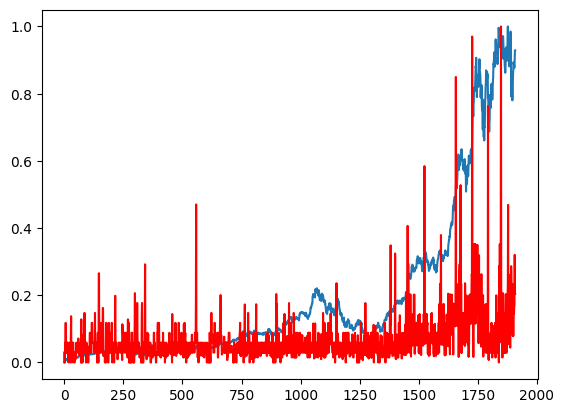

In [8]:
import matplotlib.pyplot as plt

plt.plot(df_transformed.index, df_transformed['Close'])
plt.plot(df_transformed.index, df_transformed['Total_Sentiment'],color ='red')
plt.show()

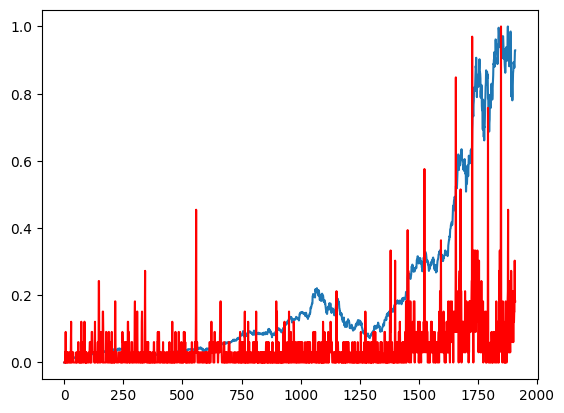

In [9]:
plt.plot(df_transformed.index, df_transformed['Close'])
plt.plot(df_transformed.index, df_transformed['Positive'],color ='red')
plt.show()

<Axes: >

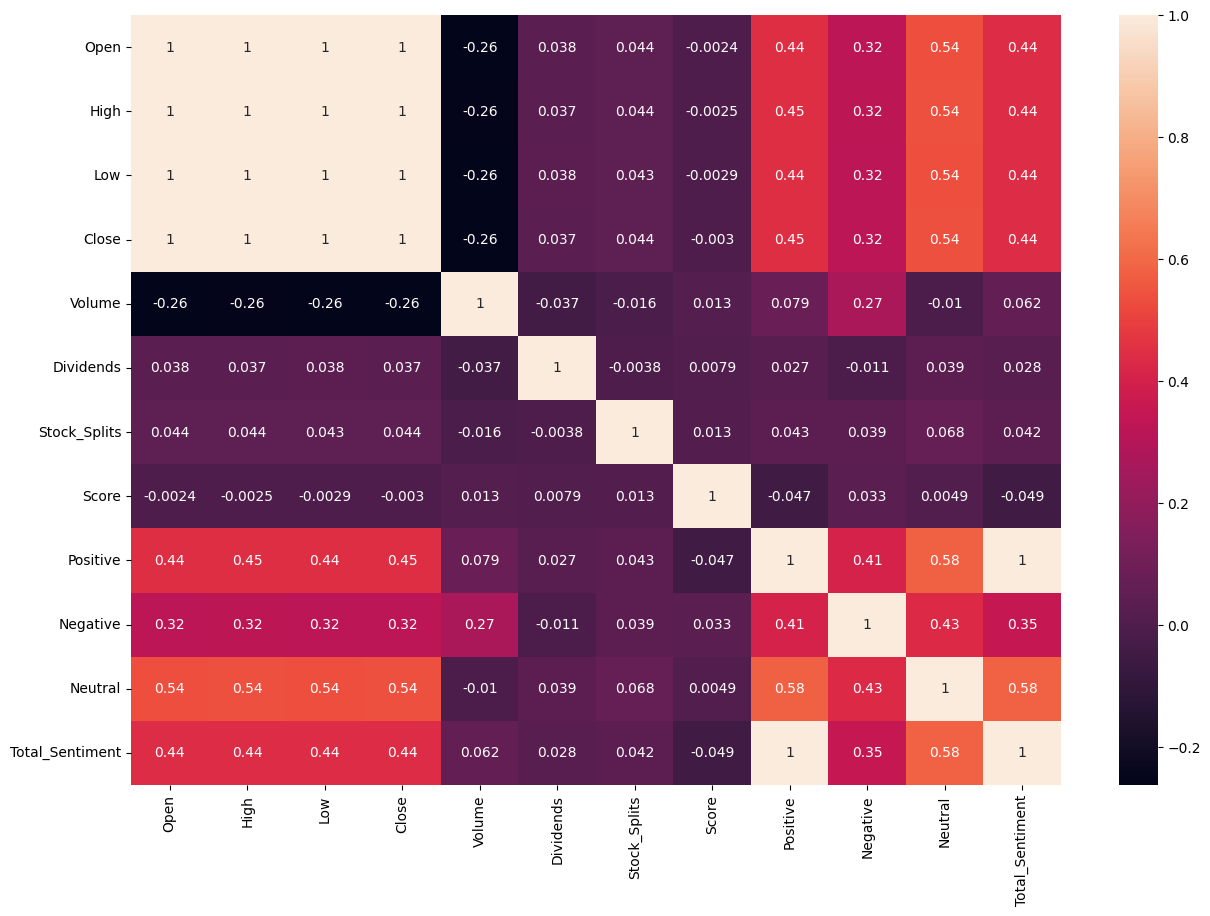

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(df.corr(),annot=True)

In [11]:
conn.close()

my_cursor.close()

True